# Prophet

## 1. 설치

- prophet
    - prophet: 선지자, 예언자

    - https://facebook.github.io/prophet/

- install

    - 윈도우 유저는 Visual Studio Build Tool을 먼저 설치해준다.
        - https://visualstudio.microsoft.com/ko/downloads/
        ![VisualStudioBuildTool](https://github.com/ElaYJ/Study_EDA/assets/153154981/5eaa1b60-53cf-41d4-acaf-94fc1319d0b7)

    - conda install pandas-datareader 
    - conda install -c conda-forge prophet
    - pip install prophet

</br>

- install이 안되면 구글 Colab을 사용한다.

    - Google Colab은 pandas-datareader와 fbprophet 모듈이 설치되어 있는 환경이다.

### 🔰 설치 확인

- Module이 오류 없이 호출된다면 설치가 완료된 것이다.

In [1]:
!pip list | findstr prophet

fbprophet                 0.7.1
prophet                   1.1.5


In [2]:
from pandas_datareader import data
from prophet import Prophet

</br>

-----
</br>

# 2. prophet 기초

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 🔰 예제 1.

- 임의의 데이터 생성

	임의의 2년 간의 데이터가 sin 그래프 경향을 나타낸다고 가정한다.

	- 'ds'는 날짜, 'y'는 관측값을 의미한다.

In [10]:
'''
'ds' - 날짜
'''
ds = pd.date_range("2021-01-01", periods=365*2, freq="D") # default "D"
'''
'y' - 관측값
'''
time = np.linspace(0, 1, 365*2)
fsin = np.sin(2 * np.pi * 12 * time)

df = pd.DataFrame({"ds": ds, "y": fsin})
df

,ds,y
0,2021-01-01,0.000000e+00
1,2021-01-02,1.032426e-01
2,2021-01-03,2.053818e-01
3,2021-01-04,3.053260e-01
4,2021-01-05,4.020070e-01
...,...,...
725,2022-12-27,-4.020070e-01
726,2022-12-28,-3.053260e-01
727,2022-12-29,-2.053818e-01
728,2022-12-30,-1.032426e-01


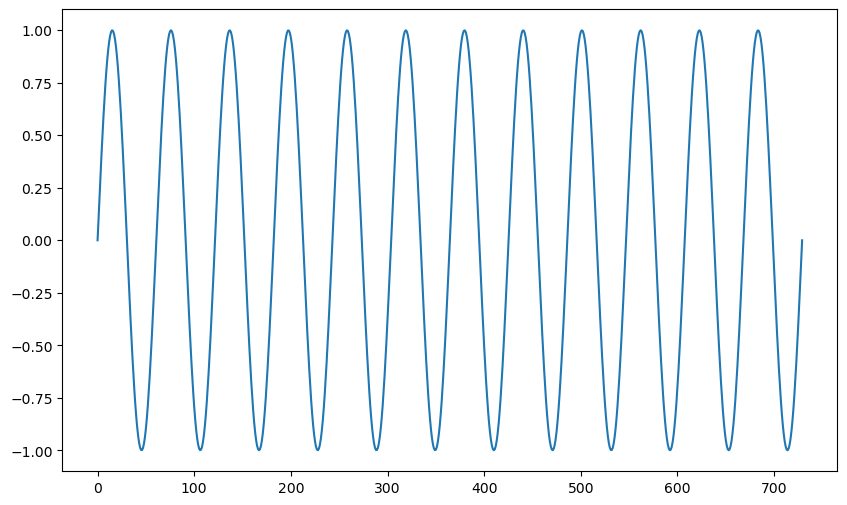

In [7]:
df["y"].plot(figsize=(10, 6));

- 미래 예측하기

	Prophet으로 학습시킨 후, 데이터를 예측시켜 본다.

- `Prophet.fit()`

	우리가 만든 데이터를 Prophet 객체에 넣어 학습시켜준다.

In [8]:
from prophet import Prophet

'''
 > 모델로 Prophet 객체 생성
'''
model = Prophet(yearly_seasonality=True, daily_seasonality=True) # 연간과 하루치 계절적 변동(seasonality)
'''
 > 모델로 데이터를 넘겨주고 학습시킴
'''
model.fit(df);

15:43:16 - cmdstanpy - INFO - Chain [1] start processing
15:43:16 - cmdstanpy - INFO - Chain [1] done processing


- `Prophet.make_future_dataframe()`

    특정 기간(periods=)을 추가한 DataFrame을 생성하는 함수

In [9]:
'''
 > 향후 30일 간의 기간을 추가한 DataFrame 생성
'''
future = model.make_future_dataframe(periods=30)
future

,ds
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05
...,...
755,2023-01-26
756,2023-01-27
757,2023-01-28
758,2023-01-29


- `Prophet.predict()`

	학습한 데이터를 바탕으로 특정 기간 동안의 기대값 데이터를 예측하는 함수

In [13]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,-0.000815,0.036011,0.108386,-0.000815,-0.000815,0.071963,0.071963,0.071963,-0.003258,-0.003258,-0.003258,-1.073141e-04,-1.073141e-04,-1.073141e-04,0.075328,0.075328,0.075328,0.0,0.0,0.0,0.071148
1,2021-01-02,-0.000790,0.136177,0.208402,-0.000790,-0.000790,0.172049,0.172049,0.172049,-0.003258,-0.003258,-0.003258,1.056911e-04,1.056911e-04,1.056911e-04,0.175201,0.175201,0.175201,0.0,0.0,0.0,0.171259
2,2021-01-03,-0.000765,0.232411,0.305590,-0.000765,-0.000765,0.269638,0.269638,0.269638,-0.003258,-0.003258,-0.003258,-3.874688e-04,-3.874688e-04,-3.874688e-04,0.273283,0.273283,0.273283,0.0,0.0,0.0,0.268873
3,2021-01-04,-0.000741,0.327391,0.399435,-0.000741,-0.000741,0.365120,0.365120,0.365120,-0.003258,-0.003258,-0.003258,-1.945776e-04,-1.945776e-04,-1.945776e-04,0.368572,0.368572,0.368572,0.0,0.0,0.0,0.364379
4,2021-01-05,-0.000716,0.419664,0.492512,-0.000716,-0.000716,0.456836,0.456836,0.456836,-0.003258,-0.003258,-0.003258,3.553072e-07,3.553072e-07,3.553072e-07,0.460094,0.460094,0.460094,0.0,0.0,0.0,0.456120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,2023-01-26,0.008617,0.508592,0.576645,0.008580,0.008668,0.534335,0.534335,0.534335,-0.003258,-0.003258,-0.003258,3.880823e-04,3.880823e-04,3.880823e-04,0.537205,0.537205,0.537205,0.0,0.0,0.0,0.542953
756,2023-01-27,0.008646,0.420312,0.490329,0.008604,0.008702,0.445282,0.445282,0.445282,-0.003258,-0.003258,-0.003258,-1.073141e-04,-1.073141e-04,-1.073141e-04,0.448647,0.448647,0.448647,0.0,0.0,0.0,0.453928
757,2023-01-28,0.008675,0.324968,0.397584,0.008628,0.008735,0.352125,0.352125,0.352125,-0.003258,-0.003258,-0.003258,1.056911e-04,1.056911e-04,1.056911e-04,0.355277,0.355277,0.355277,0.0,0.0,0.0,0.360800
758,2023-01-29,0.008703,0.227712,0.299470,0.008653,0.008768,0.254422,0.254422,0.254422,-0.003258,-0.003258,-0.003258,-3.874688e-04,-3.874688e-04,-3.874688e-04,0.258068,0.258068,0.258068,0.0,0.0,0.0,0.263126


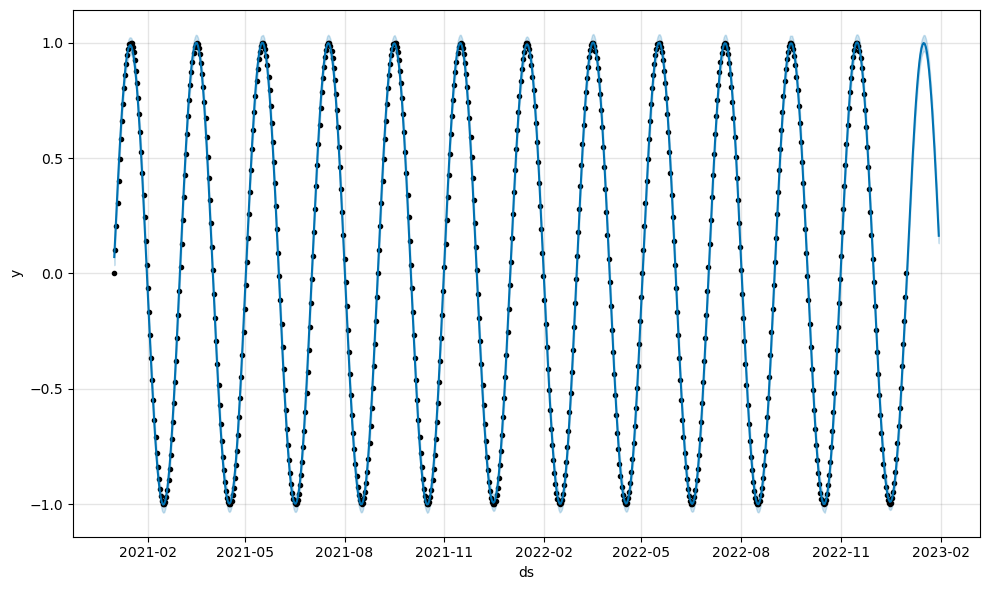

In [14]:
model.plot(forecast); # 점이 찍혀있지 않은 그래프 부분이 학습에 의한 예측값 데이터!

### 🔰 예제 2.

- 그래프에 약간의 편향성(+time)을 준다.

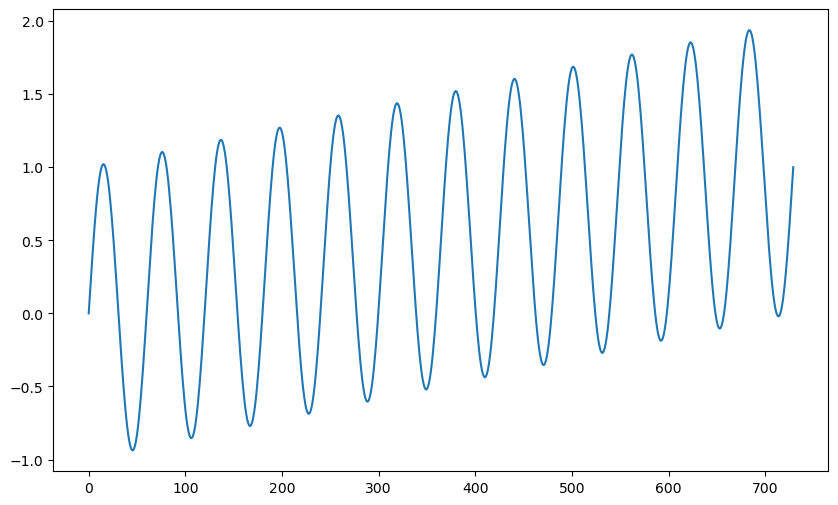

In [16]:
time = np.linspace(0, 1, 365*2)
fsin = np.sin(2 * np.pi * 12 * time) + time

ds = pd.date_range("2021-01-01", periods=365*2, freq="D") # default "D"

df = pd.DataFrame({"ds": ds, "y": fsin})
df["y"].plot(figsize=(10, 6));

16:07:09 - cmdstanpy - INFO - Chain [1] start processing
16:07:09 - cmdstanpy - INFO - Chain [1] done processing


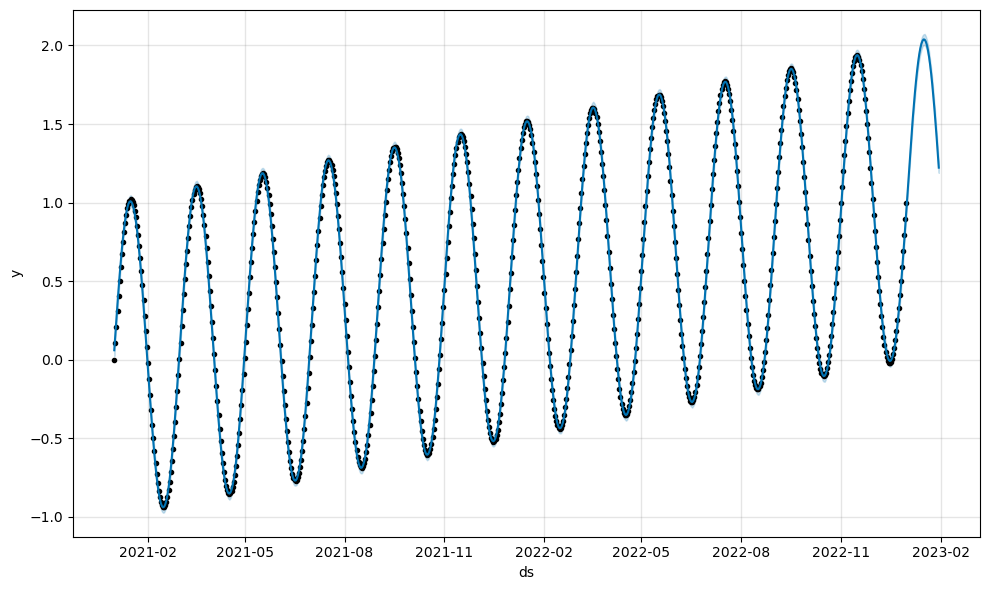

In [18]:
model = Prophet(yearly_seasonality=True, daily_seasonality=True)
model.fit(df)

future_df = model.make_future_dataframe(periods=30)
forecast = model.predict(future_df)

model.plot(forecast);

### 🔰 예제 3.

- 그래프에 노이즈(+np.random.randn(365*2)/4)를 살짝 실어본다.

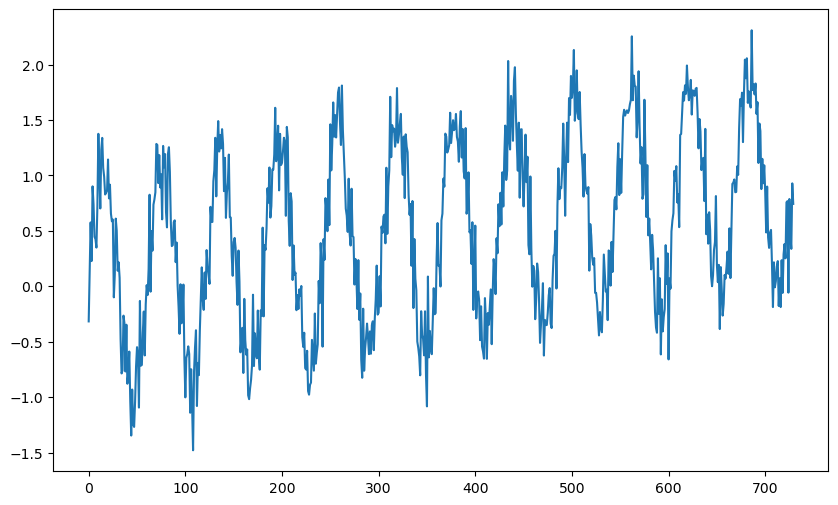

In [19]:
time = np.linspace(0, 1, 365*2)
fsin = np.sin(2 * np.pi * 12 * time) + time + np.random.randn(365*2)/4 # 노이즈

ds = pd.date_range("2021-01-01", periods=365*2, freq="D") # default "D"

df = pd.DataFrame({"ds": ds, "y": fsin})
df["y"].plot(figsize=(10, 6));

16:09:21 - cmdstanpy - INFO - Chain [1] start processing
16:09:21 - cmdstanpy - INFO - Chain [1] done processing


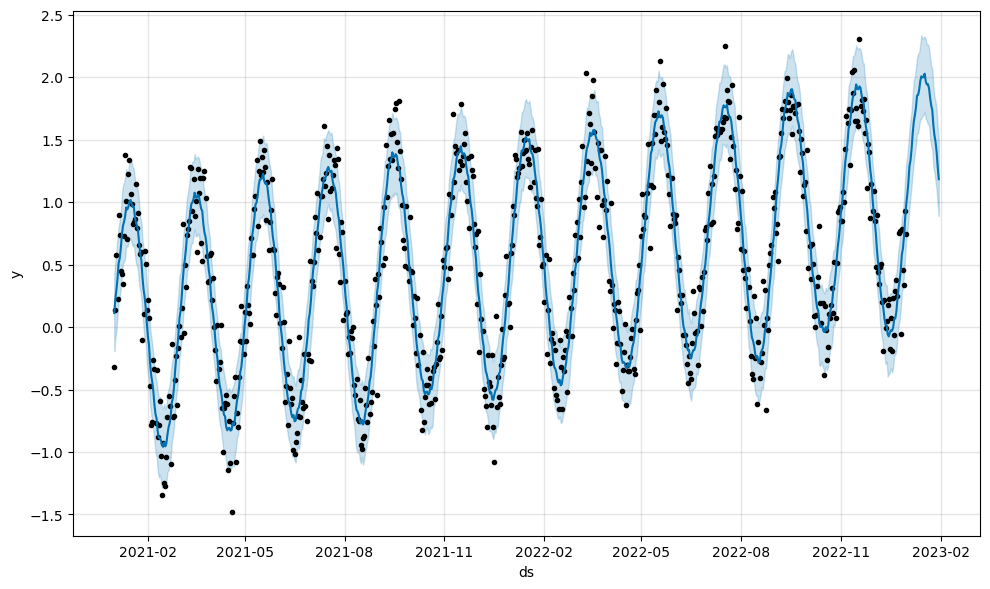

In [20]:
model = Prophet(yearly_seasonality=True, daily_seasonality=True)
model.fit(df)

future_df = model.make_future_dataframe(periods=30)
forecast = model.predict(future_df)

model.plot(forecast);